# Part 1: EDA

In [2]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename = 'dog.wav'

In [5]:
import IPython.display as ipd
import librosa
import librosa.display

## Dog Sound

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


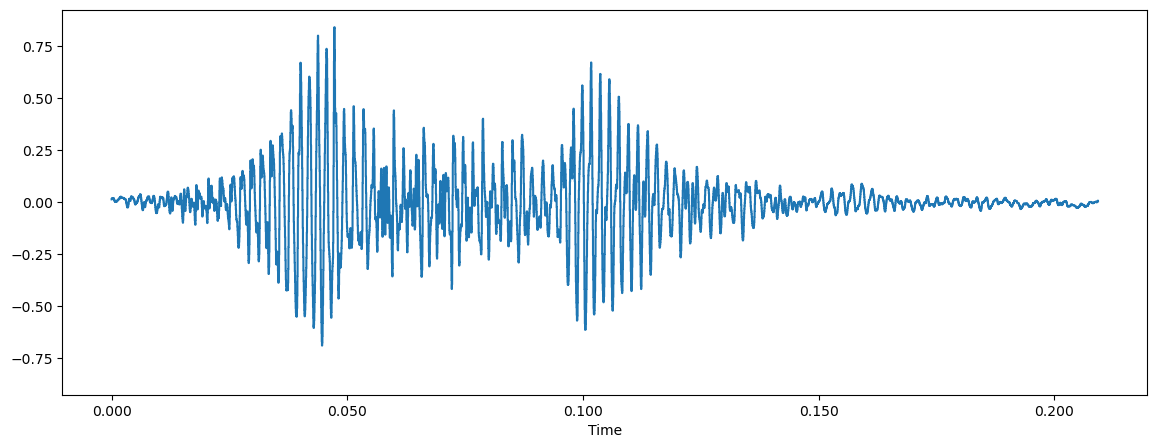

In [8]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [9]:
sample_rate

22050

In [10]:
data

array([0.01367405, 0.01881602, 0.01643142, ..., 0.0052478 , 0.00756049,
       0.0052536 ], dtype=float32)

In [11]:
import pandas as pd

In [ ]:
metadata = pd.read_csv(r'C:\Users\HARSH KUMAR\Documents\BIN Folder\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


#### Class Count

In [14]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

# Part 2: Data Preprocessing 

### Read Audio File using Librosa

In [17]:
import librosa
audio_file ='dog.wav'
librosa_audio_data,librosa_sample_rate = librosa.load(audio_file)

In [18]:
print(librosa_audio_data)

[0.01367405 0.01881602 0.01643142 ... 0.0052478  0.00756049 0.0052536 ]


In [19]:
print(librosa_sample_rate)

22050


### Librosa Audio data Ploting

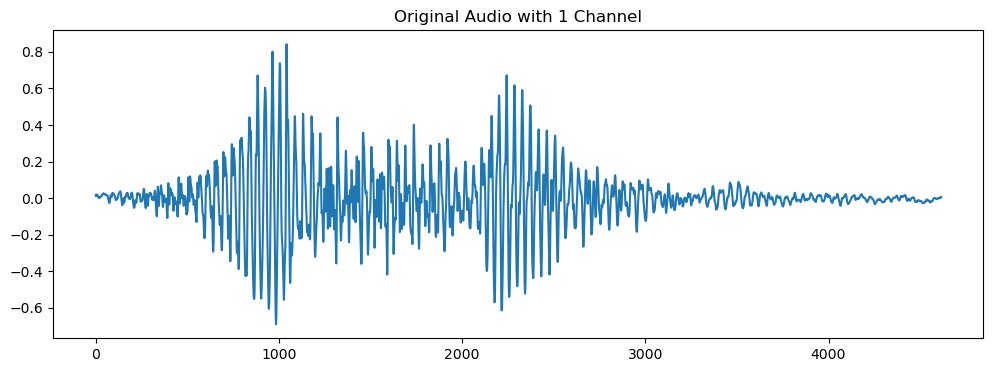

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title("Original Audio with 1 Channel")
plt.plot(librosa_audio_data)

### Observation
###### Here Librosa convert the signal to mono,meaning the channel will always be 1

### Read audio data using Scipy

In [24]:
!pip install Scipy

Defaulting to user installation because normal site-packages is not writeable


In [25]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read('traffic.wav')

In [26]:
wave_audio

array([[-1394,  4492],
       [ -295,  4660],
       [  548,  4273],
       ...,
       [ 2165,   228],
       [ 2636,   569],
       [ 3064,  1142]], dtype=int16)

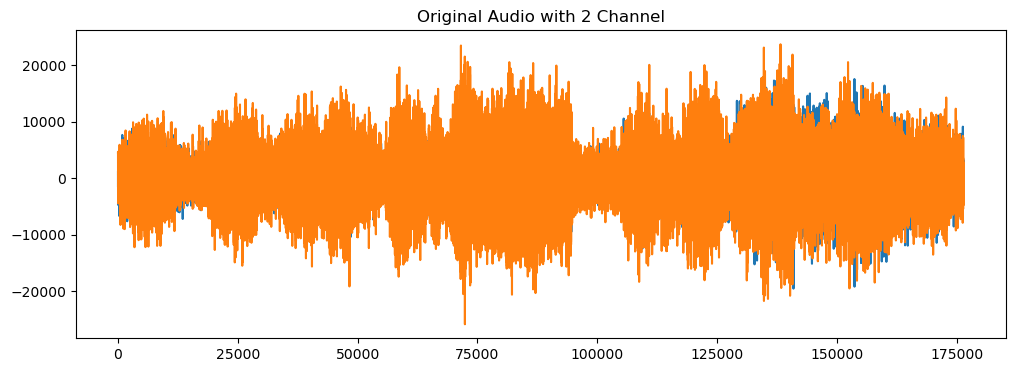

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title("Original Audio with 2 Channel")
plt.plot(wave_audio)

### Feature Extraction
#### using Mel-Frequency Cepstral Coefficients(MFCC)
##### The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.'''

In [29]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 10)


In [30]:
mfccs

array([[-2.40192780e+02, -1.52617493e+02, -1.16308640e+02,
        -1.14653175e+02, -1.28468399e+02, -1.60967087e+02,
        -2.24871490e+02, -2.85909332e+02, -3.35517578e+02,
        -3.88431488e+02],
       [ 1.57807129e+02,  1.59988281e+02,  1.48687622e+02,
         1.44386566e+02,  1.49441284e+02,  1.58995056e+02,
         1.69285522e+02,  1.65615128e+02,  1.59728668e+02,
         1.47680756e+02],
       [-5.09317856e+01, -6.96359940e+01, -8.09769897e+01,
        -7.79081573e+01, -7.50565491e+01, -6.29186134e+01,
        -5.11145020e+01, -3.24575081e+01, -9.86925888e+00,
         4.05733967e+00],
       [-2.31327400e+01, -2.93097763e+01, -3.40022888e+01,
        -3.51012383e+01, -4.08060570e+01, -3.51256409e+01,
        -2.99892445e+01, -2.28785648e+01, -1.37520885e+01,
        -2.68242788e+00],
       [ 2.27857094e+01,  1.40350676e+01,  3.39036798e+00,
        -4.14473486e+00, -1.08654194e+01, -1.37345467e+01,
        -5.62187004e+00,  2.48316622e+00,  9.36834908e+00,
         1.

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=(r'C:\Users\HARSH KUMAR\Documents\BIN Folder\UrbanSound8K\audio')
metadata=pd.read_csv(r'C:\Users\HARSH KUMAR\Documents\BIN Folder\UrbanSound8K\metadata\UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [35]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [36]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [37]:
X.shape

(8732, 40)

In [38]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [39]:
y.shape

(8732, 10)

In [40]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [42]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [43]:
X_train.shape

(6985, 40)

In [44]:
X_test.shape

(1747, 40)

In [45]:
y_train.shape

(6985, 10)

In [46]:
y_test.shape

(1747, 10)

### Model Creation

In [49]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [51]:
### No of classes
num_labels=y.shape[1]

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [55]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
210/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1214 - loss: 19.4515
Epoch 1: val_loss improved from inf to 2.29103, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1217 - loss: 18.9884 - val_accuracy: 0.1048 - val_loss: 2.2910
Epoch 2/100
206/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1283 - loss: 2.5567
Epoch 2: val_loss improved from 2.29103 to 2.27998, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1281 - loss: 2.5509 - val_accuracy: 0.1048 - val_loss: 2.2800
Epoch 3/100
205/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1270 - loss: 2.3570
Epoch 3: val_loss improved from 2.27998 to 2.27393, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1270 - loss: 2.3547 - val_accuracy: 0.1048 - val_loss: 2.2739
Epoch 4/100
215/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

In [56]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7481396794319153


In [ ]:
filename = "dog.wav"
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)  # Reshape to match model input shape

# Use model.predict and get the class with the highest probability
predictions = model.predict(prediction_feature)
predicted_class = predictions.argmax(axis=1)  # Get index of highest probability
print(predicted_class)